### Environment Setup

In [2]:
# Mount Google Drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


### Imports

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import plotly.graph_objects as go

### Create initial dataframe from the data.

In [4]:
data = "/content/drive/MyDrive/Colab Notebooks/fireball-data-analysis/fireball_data.csv"

The data was taken from NASA - CNEOS (Center for Near Earth Object Studies), you can access it from this [link](https://cneos.jpl.nasa.gov/fireballs/)

In [5]:
df = pd.read_csv(data)

In [6]:
df.head()

,Peak Brightness Date/Time (UT),Latitude (deg.),Longitude (deg.),Altitude (km),Velocity (km/s),vx,vy,vz,Total Radiated Energy (J),Calculated Total Impact Energy (kt)
0,2025-02-02 16:30:50,17.7S,24.3E,40.0,NaN,NaN,NaN,NaN,4.000000e+10,0.130
1,2025-01-11 14:46:00,1.2S,55.3E,61.0,13.2,6.8,-11.2,-1.7,2.900000e+10,0.100
2,2025-01-10 21:11:07,47.2N,106.3E,34.6,14.0,-7.1,-8.0,-9.0,2.700000e+10,0.095
3,2024-12-28 04:45:12,57.7N,168.1W,33.7,17.0,4.3,16.3,-2.2,3.100000e+10,0.110
4,2024-12-20 17:52:01,14.3N,98.1W,32.6,21.1,2.1,12.3,-17.0,1.542000e+12,3.400


With this first view of data, we can see that we have some cleanup to do, which involves -

1.   Converting Latitude and Longitude from text values to numeric values for ease of plotting
2.   Converting Total Radiated Energy from Joules to Giga Joules for better readability.
3.   It would also be helpful to split up the Peak Brightness Date/Time column into separate columns for usability.



### Converting Latitude and Longitude to numeric values

In [7]:
def convert_lat_lon(value):
    # Making sure that the value is a string and doesnt have white spaces
    value = str(value).strip()

    # South is -ve of Latitude
    if value.endswith("S"):
        return -float(value[:-1])

    # North is +ve of Latitude
    elif value.endswith("N"):
        return float(value[:-1])

    # West is -ve of Longitude
    elif value.endswith("W"):
        return -float(value[:-1])

    # West is +ve of Longitude
    elif value.endswith("E"):
        return float(value[:-1])

    # Incase the format doesnt match
    return None

In [8]:
df["Latitude"] = df["Latitude (deg.)"].apply(convert_lat_lon)
df["Longitude"] = df["Longitude (deg.)"].apply(convert_lat_lon)
df.head()

,Peak Brightness Date/Time (UT),Latitude (deg.),Longitude (deg.),Altitude (km),Velocity (km/s),vx,vy,vz,Total Radiated Energy (J),Calculated Total Impact Energy (kt),Latitude,Longitude
0,2025-02-02 16:30:50,17.7S,24.3E,40.0,NaN,NaN,NaN,NaN,4.000000e+10,0.130,-17.7,24.3
1,2025-01-11 14:46:00,1.2S,55.3E,61.0,13.2,6.8,-11.2,-1.7,2.900000e+10,0.100,-1.2,55.3
2,2025-01-10 21:11:07,47.2N,106.3E,34.6,14.0,-7.1,-8.0,-9.0,2.700000e+10,0.095,47.2,106.3
3,2024-12-28 04:45:12,57.7N,168.1W,33.7,17.0,4.3,16.3,-2.2,3.100000e+10,0.110,57.7,-168.1
4,2024-12-20 17:52:01,14.3N,98.1W,32.6,21.1,2.1,12.3,-17.0,1.542000e+12,3.400,14.3,-98.1


### Converting J to GJ for the Total Radiated Energy Column.

In [9]:
df["Total Radiated Energy (GJ)"] = df["Total Radiated Energy (J)"] / 1e9
df.head()

,Peak Brightness Date/Time (UT),Latitude (deg.),Longitude (deg.),Altitude (km),Velocity (km/s),vx,vy,vz,Total Radiated Energy (J),Calculated Total Impact Energy (kt),Latitude,Longitude,Total Radiated Energy (GJ)
0,2025-02-02 16:30:50,17.7S,24.3E,40.0,NaN,NaN,NaN,NaN,4.000000e+10,0.130,-17.7,24.3,40.0
1,2025-01-11 14:46:00,1.2S,55.3E,61.0,13.2,6.8,-11.2,-1.7,2.900000e+10,0.100,-1.2,55.3,29.0
2,2025-01-10 21:11:07,47.2N,106.3E,34.6,14.0,-7.1,-8.0,-9.0,2.700000e+10,0.095,47.2,106.3,27.0
3,2024-12-28 04:45:12,57.7N,168.1W,33.7,17.0,4.3,16.3,-2.2,3.100000e+10,0.110,57.7,-168.1,31.0
4,2024-12-20 17:52:01,14.3N,98.1W,32.6,21.1,2.1,12.3,-17.0,1.542000e+12,3.400,14.3,-98.1,1542.0


### Splitting up the Date Time columns into year, month, day and hour.

In [10]:
df["year"] = df["Peak Brightness Date/Time (UT)"].apply(lambda x: str(x)[:4])
df["month"] = df["Peak Brightness Date/Time (UT)"].apply(lambda x: x[5:][:2])
df["day"] = df["Peak Brightness Date/Time (UT)"].apply(lambda x: x[8:][:2])
df["hour"] = df["Peak Brightness Date/Time (UT)"].apply(lambda x: x[11:][:2])
df.head()

,Peak Brightness Date/Time (UT),Latitude (deg.),Longitude (deg.),Altitude (km),Velocity (km/s),vx,vy,vz,Total Radiated Energy (J),Calculated Total Impact Energy (kt),Latitude,Longitude,Total Radiated Energy (GJ),year,month,day,hour
0,2025-02-02 16:30:50,17.7S,24.3E,40.0,NaN,NaN,NaN,NaN,4.000000e+10,0.130,-17.7,24.3,40.0,2025,02,02,16
1,2025-01-11 14:46:00,1.2S,55.3E,61.0,13.2,6.8,-11.2,-1.7,2.900000e+10,0.100,-1.2,55.3,29.0,2025,01,11,14
2,2025-01-10 21:11:07,47.2N,106.3E,34.6,14.0,-7.1,-8.0,-9.0,2.700000e+10,0.095,47.2,106.3,27.0,2025,01,10,21
3,2024-12-28 04:45:12,57.7N,168.1W,33.7,17.0,4.3,16.3,-2.2,3.100000e+10,0.110,57.7,-168.1,31.0,2024,12,28,04
4,2024-12-20 17:52:01,14.3N,98.1W,32.6,21.1,2.1,12.3,-17.0,1.542000e+12,3.400,14.3,-98.1,1542.0,2024,12,20,17


### Rearranging the columns

In [11]:
df = df[['Peak Brightness Date/Time (UT)', 'year', 'month', 'day', 'hour', 'Latitude (deg.)', 'Longitude (deg.)', 'Latitude', 'Longitude', 'Altitude (km)', 'Velocity (km/s)', 'vx', 'vy', 'vz', 'Total Radiated Energy (J)', 'Total Radiated Energy (GJ)', 'Calculated Total Impact Energy (kt)']]
df.head()

,Peak Brightness Date/Time (UT),year,month,day,hour,Latitude (deg.),Longitude (deg.),Latitude,Longitude,Altitude (km),Velocity (km/s),vx,vy,vz,Total Radiated Energy (J),Total Radiated Energy (GJ),Calculated Total Impact Energy (kt)
0,2025-02-02 16:30:50,2025,02,02,16,17.7S,24.3E,-17.7,24.3,40.0,NaN,NaN,NaN,NaN,4.000000e+10,40.0,0.130
1,2025-01-11 14:46:00,2025,01,11,14,1.2S,55.3E,-1.2,55.3,61.0,13.2,6.8,-11.2,-1.7,2.900000e+10,29.0,0.100
2,2025-01-10 21:11:07,2025,01,10,21,47.2N,106.3E,47.2,106.3,34.6,14.0,-7.1,-8.0,-9.0,2.700000e+10,27.0,0.095
3,2024-12-28 04:45:12,2024,12,28,04,57.7N,168.1W,57.7,-168.1,33.7,17.0,4.3,16.3,-2.2,3.100000e+10,31.0,0.110
4,2024-12-20 17:52:01,2024,12,20,17,14.3N,98.1W,14.3,-98.1,32.6,21.1,2.1,12.3,-17.0,1.542000e+12,1542.0,3.400


### Checking correlations between the columns

In [12]:
df[["Calculated Total Impact Energy (kt)", "Latitude", "Longitude", "Velocity (km/s)", "Altitude (km)", "Total Radiated Energy (GJ)", "vx", "vy", "vz"]].corr()

,Calculated Total Impact Energy (kt),Latitude,Longitude,Velocity (km/s),Altitude (km),Total Radiated Energy (GJ),vx,vy,vz
Calculated Total Impact Energy (kt),1.000000,0.056373,0.038521,-0.000838,-0.076489,0.998107,0.079844,-0.056581,-0.019957
Latitude,0.056373,1.000000,-0.061569,0.085537,-0.031341,0.055834,-0.089930,0.004002,-0.587317
Longitude,0.038521,-0.061569,1.000000,0.069349,-0.101879,0.033088,0.102484,-0.519334,-0.054855
Velocity (km/s),-0.000838,0.085537,0.069349,1.000000,0.236270,-0.000505,0.023754,-0.115827,-0.112414
Altitude (km),-0.076489,-0.031341,-0.101879,0.236270,1.000000,-0.068694,-0.069065,-0.005295,-0.031758
Total Radiated Energy (GJ),0.998107,0.055834,0.033088,-0.000505,-0.068694,1.000000,0.073984,-0.057058,-0.017876
vx,0.079844,-0.089930,0.102484,0.023754,-0.069065,0.073984,1.000000,-0.096642,-0.002039
vy,-0.056581,0.004002,-0.519334,-0.115827,-0.005295,-0.057058,-0.096642,1.000000,0.034222
vz,-0.019957,-0.587317,-0.054855,-0.112414,-0.031758,-0.017876,-0.002039,0.034222,1.000000


As we can see,

The most notable correlation, as expected, is between the **Total Radiated Energy (GJ)** and the **Calculated Total Impact Energy (kt)**

This confirms the formula used by NASA to estimate Total Impact Energy (E) from the Total Radiated Energy (Eo)

𝐸 = 8.2508 × 10 <sup>0.885</sup>

The Total Impact Energy (E) is the final energy released upon explosion, including heat, shockwaves, etc.

The Total Radiated Energy (Eo) is the optical energy seen as the fireball's brightness.

Apart from this, we dont see any other notable trends, so it would not make sense to try and fit statistical models like regression or classification to the data to generate predictions, although it seems interesting to try and use clustering to find any additional insights to the data.

In [13]:
df.to_csv("test.csv")

### Plotting the locations of all fireballs and bolides along with the total impact energy.

In [ ]:
# Some values are too large and make other data points smaller, so we apply log scaling.
df["Size"] = df["Calculated Total Impact Energy (kt)"].apply(lambda x: max(3, min(20, np.log1p(x) * 5)))

# Create plotly globe
fig = go.Figure()

# Add scatter plot for meteor impacts
fig.add_trace(go.Scattergeo(
    lon=df["Longitude"],
    lat=df["Latitude"],
    text=df["year"].astype(str) + "<br>Impact Energy: " + df["Calculated Total Impact Energy (kt)"].astype(str) + " kt",
    mode="markers",
    marker=dict(
        size=df["Size"],
        color=np.log1p(df["Calculated Total Impact Energy (kt)"]),
        colorscale="Inferno",
        cmin=np.log1p(df["Calculated Total Impact Energy (kt)"]).min(),
        cmax=np.log1p(df["Calculated Total Impact Energy (kt)"]).max(),
        showscale=True,
        colorbar=dict(
            title="Impact Energy (log scale) kt",
            titleside="right",
            ticks="outside"
        )
    )
))

# # Making the globe rotate
# fig.update_geos(
#     projection_type="orthographic",
#     showcountries=True,
#     showcoastlines=True
# )

# # Rotation frames
# frames = [go.Frame(layout=dict(geo=dict(projection_rotation=dict(lon=i)))) for i in np.linspace(0, 360, 90)]

# fig.frames = frames

# # Add title
# fig.update_layout(
#     title=dict(
#         text="Fireball & Bolide Spottings ☄️",
#         font=dict(size=20),
#         x=0.5
#     ),
#     # size of the figure
#     width=1200,
#     height=800,
#     updatemenus=[dict(
#         type="buttons",
#         showactive=True,
#         buttons=[
#             dict(label="Play",
#                  method="animate",
#                  args=[None, dict(frame=dict(duration=120, easing="linear"))]),
#             dict(label="Pause",
#                  method="animate",
#                  args=[[None], dict(frame=dict(duration=0), mode="immediate")])
#         ]
#     )]
# )

fig.show()

### Plotting the number of occurences

### 1. Yearly

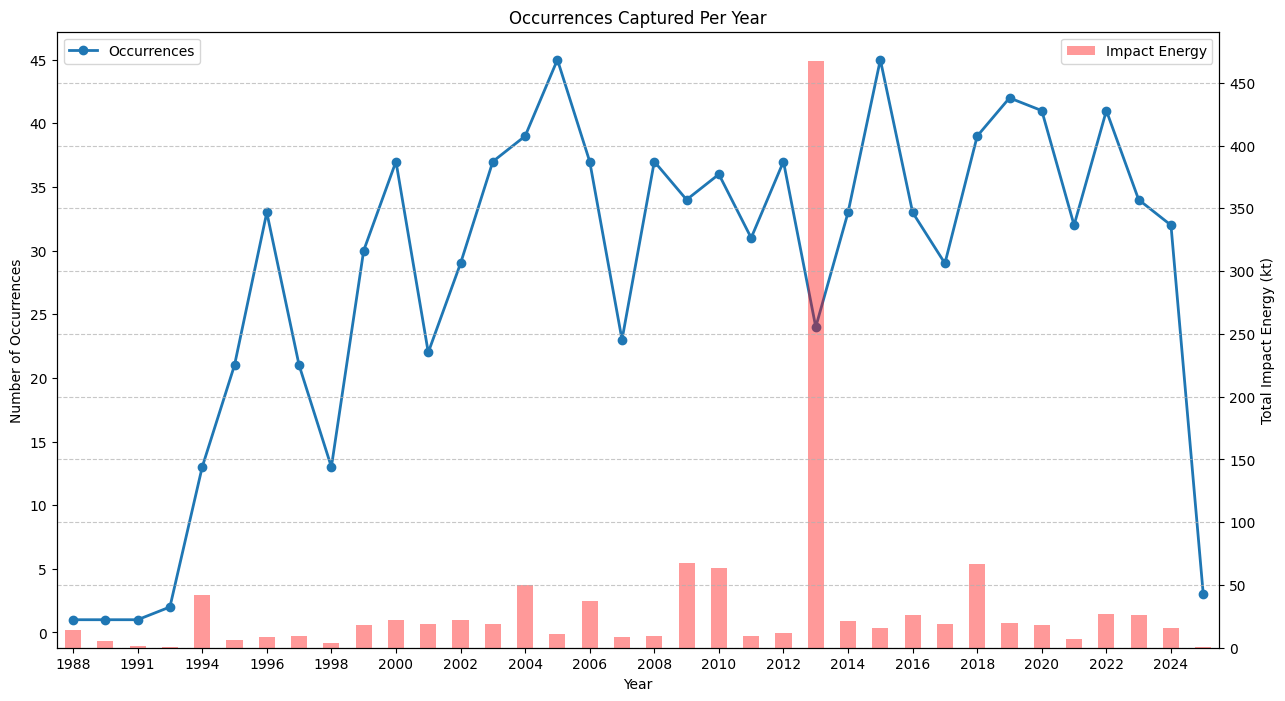

In [ ]:
fig, ax1 = plt.subplots(figsize=(15, 8))

# Count occurrences per year
yearly_counts = df["year"].value_counts().sort_index()

# Plot occurrences on ax1
ax1.plot(yearly_counts.index, yearly_counts.values, marker="o", linestyle="-", linewidth=2, label="Occurrences")
ax1.set_xlabel("Year")
ax1.set_ylabel("Number of Occurrences")
ax1.tick_params(axis="y")

# Create second y-axis
ax2 = ax1.twinx()

# Sum impact energy per year
impact_energy = df.groupby("year")["Calculated Total Impact Energy (kt)"].sum()

# Plot impact energy as bars
impact_energy.plot(kind="bar", alpha=0.4, color="red", ax=ax2, label="Impact Energy")
ax2.set_ylabel("Total Impact Energy (kt)")
ax2.tick_params(axis="y")

# Adjust x-axis ticks for better readability
ax1.set_xticks(yearly_counts.index[::2])  # Show every 2nd year
ax1.yaxis.set_major_locator(plt.MaxNLocator(nbins=10))
ax2.yaxis.set_major_locator(plt.MaxNLocator(nbins=10))

# Legends
ax1.legend(loc="upper left")
ax2.legend(loc="upper right")

plt.title("Occurrences Captured Per Year")
plt.grid(axis="y", linestyle="--", alpha=0.7)

plt.show()

We can see here that the occurrences are increasing over time. This can be because of the improvement in detection technology rather than experiencing more meteors.

The huge spike in the impact value in 2013 is because of the Chelyabinsk Superbolide event, which was recorded in Russia. This had an impact of around 440 kt, which is 30x the impact of Hiroshima.

### 2. Monthly

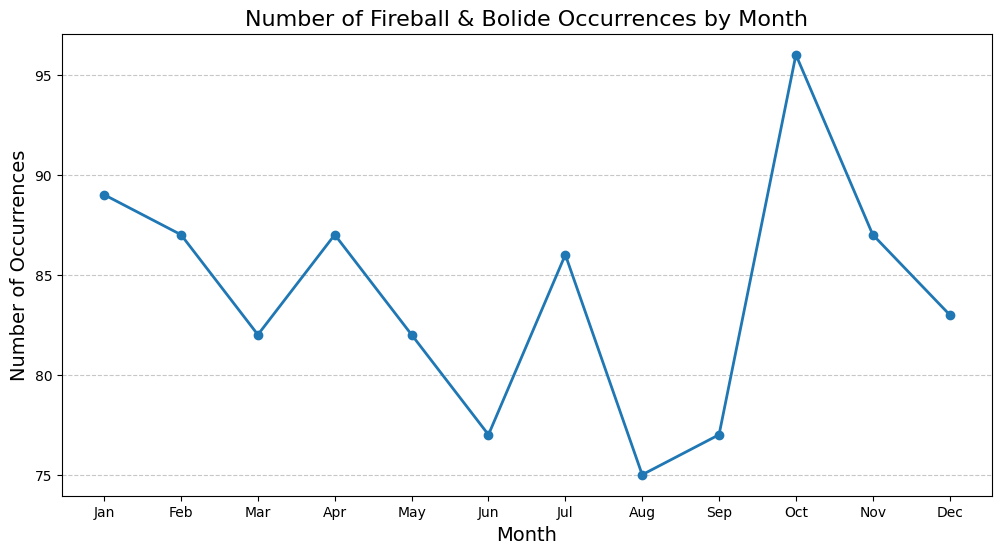

In [17]:
df["month"] = pd.to_numeric(df["month"], errors="coerce")

monthly_counts = df["month"].value_counts().sort_index()

plt.figure(figsize=(12, 6))
plt.plot(monthly_counts.index, monthly_counts.values, marker="o", linestyle="-", linewidth=2)
plt.xlabel("Month", fontsize=14)
plt.ylabel("Number of Occurrences", fontsize=14)
plt.title("Number of Fireball & Bolide Occurrences by Month", fontsize=16)
plt.xticks(range(1, 13), ["Jan", "Feb", "Mar", "Apr", "May", "Jun", "Jul", "Aug", "Sep", "Oct", "Nov", "Dec"])
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.show()

According to the chart, October seems to be the most likely month for fireballs, followed by January, April and July

### 3. Daily

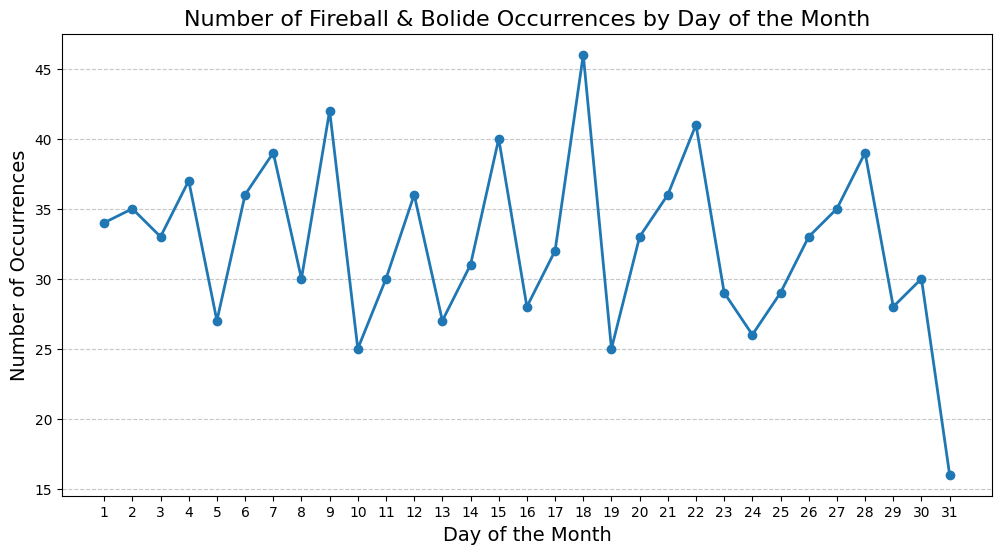

In [ ]:
# Ensure day column is numeric
df["day"] = pd.to_numeric(df["day"], errors="coerce")

# Count occurrences for each day of the month
daily_counts = df["day"].value_counts().sort_index()

# Plot occurrences against the days of the month
plt.figure(figsize=(12, 6))
plt.plot(daily_counts.index, daily_counts.values, marker="o", linestyle="-", linewidth=2)
plt.xlabel("Day of the Month", fontsize=14)
plt.ylabel("Number of Occurrences", fontsize=14)
plt.title("Number of Fireball & Bolide Occurrences by Day of the Month", fontsize=16)
plt.xticks(range(1, 32))
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.show()


### 4. Hourly

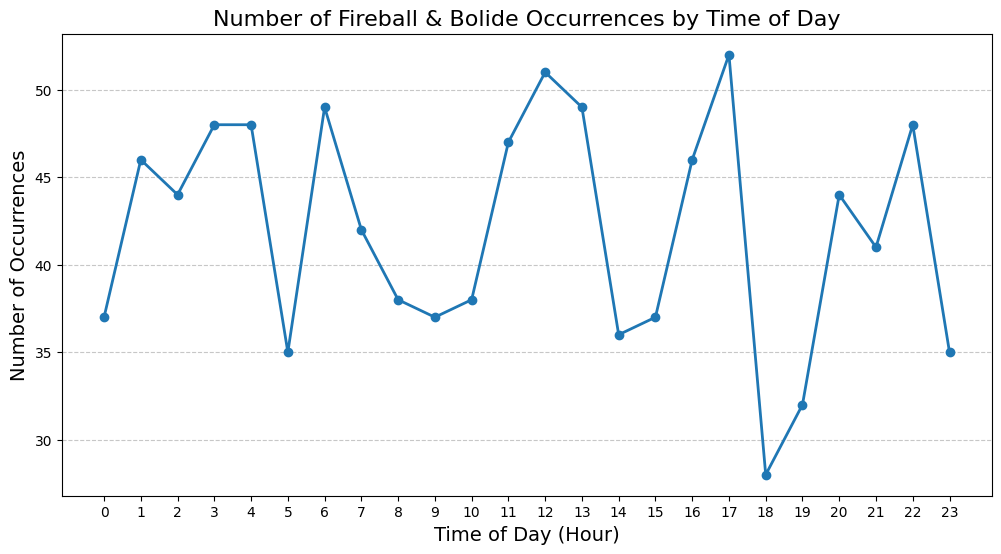

In [ ]:
# Ensure hour column is numeric
df["hour"] = pd.to_numeric(df["hour"], errors="coerce")

# Count occurrences for each hour
hourly_counts = df["hour"].value_counts().sort_index()

# Plot occurrences against the time of day
plt.figure(figsize=(12, 6))
plt.plot(hourly_counts.index, hourly_counts.values, marker="o", linestyle="-", linewidth=2)
plt.xlabel("Time of Day (Hour)", fontsize=14)
plt.ylabel("Number of Occurrences", fontsize=14)
plt.title("Number of Fireball & Bolide Occurrences by Time of Day", fontsize=16)
plt.xticks(range(0, 24))  # Ensure all hours appear
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.show()


### Plotting Velocity vs Impact Energy

We will remove events with kt greater than 10 kt, to prevent them from sqashiing together other smaller data points.

In [14]:
df = df[df["Calculated Total Impact Energy (kt)"] <= 10]

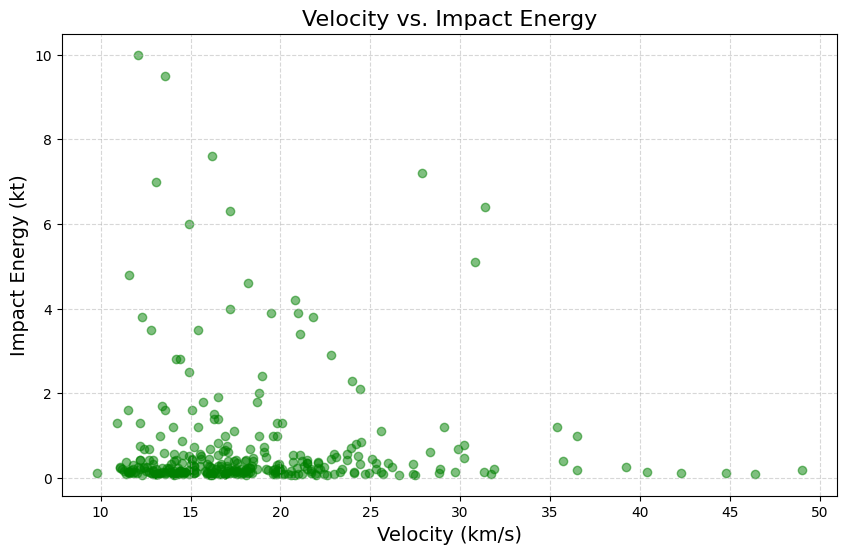

In [16]:
plt.figure(figsize=(10, 6))

# Scatter plot
plt.scatter(df["Velocity (km/s)"], df["Calculated Total Impact Energy (kt)"],
            color="green", alpha=0.5, label="Data Points")

# Labels & title
plt.xlabel("Velocity (km/s)", fontsize=14)
plt.ylabel("Impact Energy (kt)", fontsize=14)
plt.title("Velocity vs. Impact Energy", fontsize=16)


plt.grid(True, linestyle="--", alpha=0.5)
plt.show()

This tells us that most high impact bolides and fireballs occur at lower velocities. High velocity meteors have low impact energies.

Faster meteors might disintegrate before impact due to atmospheric friction.
This would explain why high-energy meteors are mostly slow-moving.

### Plotting Altitude vs Impact Energy

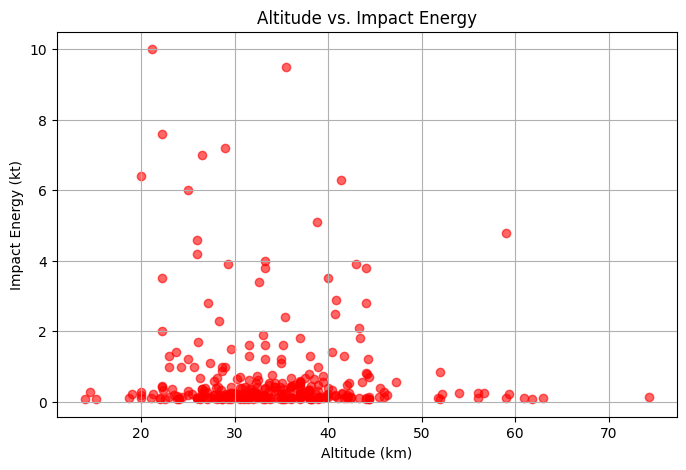

In [19]:
plt.figure(figsize=(8,5))

# Scatter plot
plt.scatter(df["Altitude (km)"], df["Calculated Total Impact Energy (kt)"], alpha=0.6, color="red")

# Labels & title
plt.xlabel("Altitude (km)")
plt.ylabel("Impact Energy (kt)")
plt.title("Altitude vs. Impact Energy")

plt.grid(True)
plt.show()


Here we can see that most fireballs explode between 20-50km
Most meteors typically burn up in the mesosphere, which is around 50-85km
Most data points are clustered in this range.
Higher impact events happen at a lower 20-40km range.

Impact energy is much lower at higher altitudes over 50km. Which means that the small meteors burn up early and dont explode.

### Plotting Latitude vs Vertical Velocity

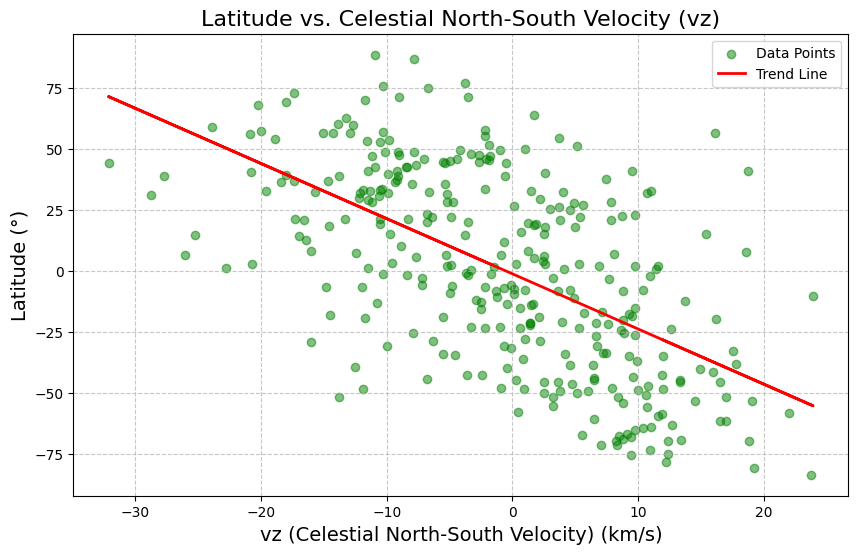

In [17]:
df = df.dropna(subset=["vz", "Latitude"])

plt.figure(figsize=(10, 6))

# Scatter plot
plt.scatter(df["vz"], df["Latitude"],
            color="green", alpha=0.5, label="Data Points")

# Trend line (Linear Regression)
m, b = np.polyfit(df["vz"], df["Latitude"], 1)  # Fit y = mx + b
plt.plot(df["vz"], m * df["vz"] + b, color="red", linewidth=2, label="Trend Line")

# Labels & Title
plt.xlabel("vz (Celestial North-South Velocity) (km/s)", fontsize=14)
plt.ylabel("Latitude (°)", fontsize=14)
plt.title("Latitude vs. Celestial North-South Velocity (vz)", fontsize=16)
plt.legend()
plt.grid(True, linestyle="--", alpha=0.7)
plt.show()

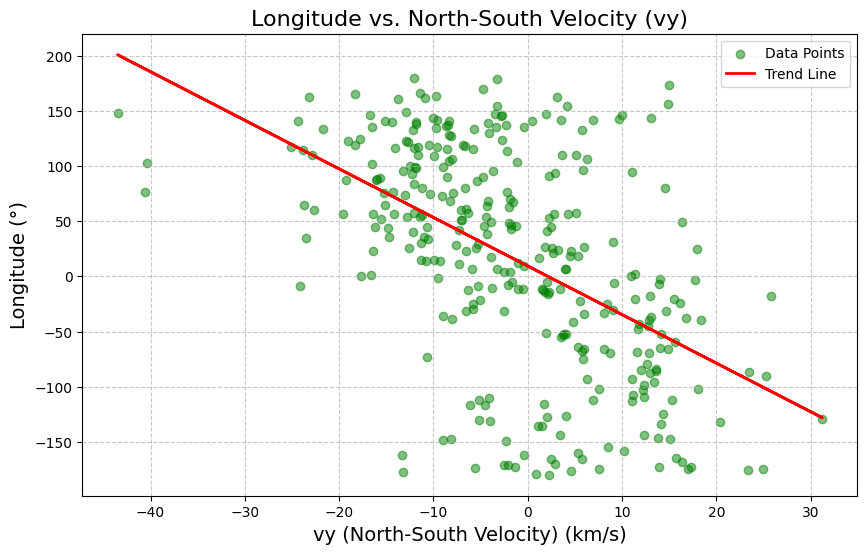

In [18]:
df = df.dropna(subset=["vy", "Longitude"])

plt.figure(figsize=(10, 6))

# Scatter plot
plt.scatter(df["vy"], df["Longitude"],
            color="green", alpha=0.5, label="Data Points")

# Trend line (Linear Regression)
m, b = np.polyfit(df["vy"], df["Longitude"], 1)  # Fit y = mx + b
plt.plot(df["vy"], m * df["vy"] + b, color="red", linewidth=2, label="Trend Line")

# Labels & Title
plt.xlabel("vy (North-South Velocity) (km/s)", fontsize=14)
plt.ylabel("Longitude (°)", fontsize=14)
plt.title("Longitude vs. North-South Velocity (vy)", fontsize=16)
plt.legend()
plt.grid(True, linestyle="--", alpha=0.7)
plt.show()